# Diabetes Data EDA

#### Requirements

In [3]:
!pip install openpyxl

In [4]:
!pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

#### loading xlsx file

In [6]:
df = pd.read_excel('diabetes_data.xlsx')
df.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Exploring dimensions, dtypes of columns of dataframe

In [7]:
df.shape

(101766, 51)

In [8]:
df.size

5190066

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [10]:
#df.describe().T

#### checking null values

In [11]:
missing_values = df.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                              0
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                 

#### counting unique entries in each column

In [12]:
df.nunique()

id                          101766
encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide      

#### univariate analysis

#### Demographic information columns race, gender, age and weight

In [13]:
#counting unique patients in the data
df['patient_nbr'].value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

In [14]:
df['race'].value_counts()  #here we find '?' as record entries in many case

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [15]:
# count the number of genders among different categories
df['gender'].value_counts() 

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [16]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [17]:
# counting patient in each age group
df['age'].value_counts() 

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [18]:
df['age'].value_counts().sum()

101766

In [19]:
df['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [20]:
# counting patient in each weight group but here very less records have weight sspecified i.e 3197/101766
df['weight'].value_counts()

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

#### Patient admission categories and discharge ids

In [21]:
# referred by emergency room
df['admission_source_id'].value_counts()

admission_source_id
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64

In [22]:
#admission_type_id 
#Emergency, urgent constitute the major proportion of the followed by elective admissions
df['admission_type_id'].value_counts()

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

In [23]:
# Identify where the patient was discharged to after treatment (discharged to home, followed by nursing, etc.)
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

#### patient details of admission like stay period, diagnostics undergone, ward speciality, no of medications

In [24]:
#time_in_hospital - Integer number of days between admission and discharge
df['time_in_hospital'].value_counts()

time_in_hospital
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64

In [25]:
df['medical_specialty'].value_counts()
#though 50% data is not there and lot of categories around 73---> it directly describe the expense incured using such medical assistance

medical_specialty
?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64

In [26]:
# Number of lab procedures performed 
df['num_lab_procedures'].value_counts()

num_lab_procedures
1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
120       1
132       1
121       1
126       1
118       1
Name: count, Length: 118, dtype: int64

In [27]:
# Number of non lab procedures performed 
df['num_procedures'].value_counts()

num_procedures
0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: count, dtype: int64

In [28]:
# num_medications - Number of distinct generic names 
df['num_medications'].value_counts()

num_medications
13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64

In [29]:
# number of diagnoses entered
# Average of 8–10 diagnoses was entered for the majority of the patients.
df['number_diagnoses'].value_counts()

number_diagnoses
9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: count, dtype: int64

#### Financing data

In [30]:
df['payer_code'].value_counts()

payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64

#### patient visit types also relfect costing among 3 categories: Outpatient, Inpatient, emergency

In [31]:
#print(df['number_outpatient'].value_counts())
#print(df['number_inpatient'].value_counts())
print(df['number_emergency'].value_counts())

number_emergency
0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: count, dtype: int64


#### Exploring medical tests

In [32]:
df['max_glu_serum'].value_counts()
# range of glucose level but most entries have Null values

max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64

In [33]:
df['A1Cresult'].value_counts()
# range of test level but most entries have Null values

A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

#### 23 Medicines 

In [34]:
df['repaglinide'].value_counts()  # all entries have 'No' values

repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64

In [35]:
df['citoglipton'].value_counts()  # all entries have 'No' values

citoglipton
No    101766
Name: count, dtype: int64

In [36]:
# drop these two features

#### columns are change, diabetesMeds, readmitted

In [37]:
# Indicates if there was a change in diabetic medications
print("Column:", df['change'].value_counts())
print("-----------------------")
# diabetesMed - Indicates if there was any diabetic medication prescribed
print("Column:", df['diabetesMed'].value_counts())
print("-----------------------")
# readmitted - 30 days, >30 if the patient was readmitted in more than 30 days, and No for no record of readmission
print("Column:", df['readmitted'].value_counts())

Column: change
No    54755
Ch    47011
Name: count, dtype: int64
-----------------------
Column: diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64
-----------------------
Column: readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


#### Cleaning data

In [77]:
tdf=df.copy()
#making a copy of dataframe

In [79]:
#There are 101,766 unique encounter/ admissions in the dataset of 71518 unique patients.
tdf = tdf.drop_duplicates(subset=['patient_nbr'])

In [81]:
tdf.shape

(71518, 24)

In [80]:
# Dropping or remove Uninformative Features 'id', 'weight', 'examide', 'citoglipton'
features_drop_list = ['id','encounter_id', 'patient_nbr', 'weight', 'payer_code','admission_source_id', 'discharge_disposition_id', 'medical_specialty','diag_1', 'diag_2', 'diag_3', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone','metformin.pioglitazone', 'acetohexamide', 'tolbutamide']

#features_drop_list = ['admission_source_id', 'discharge_disposition_id']  ## too many categories
tdf.drop(features_drop_list, axis=1, inplace=True)


#### featuring -  Transforming categorical data via Label Encoding 

In [82]:
# Replace '?' with NaN
#tdf.replace('?', np.nan, inplace=True)

# either replace 'unknown' gender with female or drop those 3 rows
tdf['gender'] = tdf['gender'].replace('Unknown/Invalid', 'Female')
tdf['gender'] = tdf['gender'].replace('Male', 1)
tdf['gender'] = tdf['gender'].replace('Female', 0)

#fixing age to mid values
for i in range(0,10):
    tdf['age'] = tdf['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)

#change in medcine
tdf['change']=tdf['change'].replace('No', 0)
tdf['change']=tdf['change'].replace('Ch', 1)

# Replace "Yes" with 1 in the 'diabetesMed' column similarly for with '0' in place of 'No'
tdf['diabetesMed'] = tdf['diabetesMed'].replace('Yes', 1)
tdf['diabetesMed'] = tdf['diabetesMed'].replace('No', 0)

# adding more cardinal value to readmission <30 as 2 -----> contribute to cost
tdf['readmitted']=tdf['readmitted'].replace('NO', 0)
tdf['readmitted']=tdf['readmitted'].replace('>30', 1)
tdf['readmitted']=tdf['readmitted'].replace('<30', 2)



In [83]:
# medical test category into numeric  --  require domain knowledge--> higher glucose level --> high medication --> hish cost
tdf['max_glu_serum']=tdf['max_glu_serum'].replace(np.nan, 0)
tdf['max_glu_serum']=tdf['max_glu_serum'].replace("Norm", 1)
tdf['max_glu_serum']=tdf['max_glu_serum'].replace(">200", 2)
tdf['max_glu_serum']=tdf['max_glu_serum'].replace(">300", 3)
tdf['max_glu_serum'].value_counts()
#similar for A1c test also
tdf['A1Cresult']=tdf['A1Cresult'].replace(np.nan, 0)
tdf['A1Cresult']=tdf['A1Cresult'].replace("Norm", 1)
tdf['A1Cresult']=tdf['A1Cresult'].replace(">7", 2)
tdf['A1Cresult']=tdf['A1Cresult'].replace(">8", 3)
tdf['A1Cresult'].value_counts()

A1Cresult
0    58532
3     6304
1     3791
2     2891
Name: count, dtype: int64

In [84]:
#Drugs features into numeric
drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
for i in drug_list:
    tdf[i] = tdf[i].replace('No', 0)
    tdf[i] = tdf[i].replace('Steady', 2)
    tdf[i] = tdf[i].replace('Down', 1)
    tdf[i] = tdf[i].replace('Up', 3)

tdf.insulin.value_counts()

insulin
0    34921
2    22129
1     7505
3     6963
Name: count, dtype: int64

In [47]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   race                71518 non-null  object
 1   gender              71518 non-null  int64 
 2   age                 71518 non-null  int64 
 3   admission_type_id   71518 non-null  int64 
 4   time_in_hospital    71518 non-null  int64 
 5   num_lab_procedures  71518 non-null  int64 
 6   num_procedures      71518 non-null  int64 
 7   num_medications     71518 non-null  int64 
 8   number_outpatient   71518 non-null  int64 
 9   number_emergency    71518 non-null  int64 
 10  number_inpatient    71518 non-null  int64 
 11  number_diagnoses    71518 non-null  int64 
 12  max_glu_serum       71518 non-null  int64 
 13  A1Cresult           71518 non-null  int64 
 14  metformin           71518 non-null  int64 
 15  glimepiride         71518 non-null  int64 
 16  glipizide           71518 

In [94]:
tdf['admission_type_id'].value_counts()

#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#tdf['admission_type_id_encoded'] = label_encoder.fit_transform(tdf['admission_type_id'])

#frequency encoding
#admission_type_counts = tdf['admission_type_id'].value_counts().to_dict()
#tdf['admission_type_count_encoded'] = tdf['admission_type_id'].map(admission_type_counts)

#tdf['admission_type_count_encoded'].value_counts()
#tdf.drop('admission_type_count_encoded', axis=1, inplace=True)
tdf1 = tdf.drop('race', axis=1)

tdf['race'].replace('?', 'Other', inplace=True)
tdf['race'].value_counts()

race
Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: count, dtype: int64

In [85]:
tdf.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,71518.0,0.468274,0.498996,0.0,0.0,0.0,1.0,1.0
age,71518.0,65.651864,15.978075,5.0,55.0,65.0,75.0,95.0
admission_type_id,71518.0,2.100254,1.508301,1.0,1.0,1.0,3.0,8.0
time_in_hospital,71518.0,4.289130,2.949210,1.0,2.0,3.0,6.0,14.0
num_lab_procedures,71518.0,43.075478,19.952338,1.0,31.0,44.0,57.0,132.0
num_procedures,71518.0,1.430577,1.759864,0.0,0.0,1.0,2.0,6.0
num_medications,71518.0,15.705025,8.311163,1.0,10.0,14.0,20.0,81.0
number_outpatient,71518.0,0.280069,1.068957,0.0,0.0,0.0,0.0,42.0
number_emergency,71518.0,0.103540,0.509187,0.0,0.0,0.0,0.0,42.0
number_inpatient,71518.0,0.177829,0.603790,0.0,0.0,0.0,0.0,12.0


In [87]:
tdf.info()  # dataframe with race column

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   race                71518 non-null  object
 1   gender              71518 non-null  int64 
 2   age                 71518 non-null  int64 
 3   admission_type_id   71518 non-null  int64 
 4   time_in_hospital    71518 non-null  int64 
 5   num_lab_procedures  71518 non-null  int64 
 6   num_procedures      71518 non-null  int64 
 7   num_medications     71518 non-null  int64 
 8   number_outpatient   71518 non-null  int64 
 9   number_emergency    71518 non-null  int64 
 10  number_inpatient    71518 non-null  int64 
 11  number_diagnoses    71518 non-null  int64 
 12  max_glu_serum       71518 non-null  int64 
 13  A1Cresult           71518 non-null  int64 
 14  metformin           71518 non-null  int64 
 15  glimepiride         71518 non-null  int64 
 16  glipizide           71518 

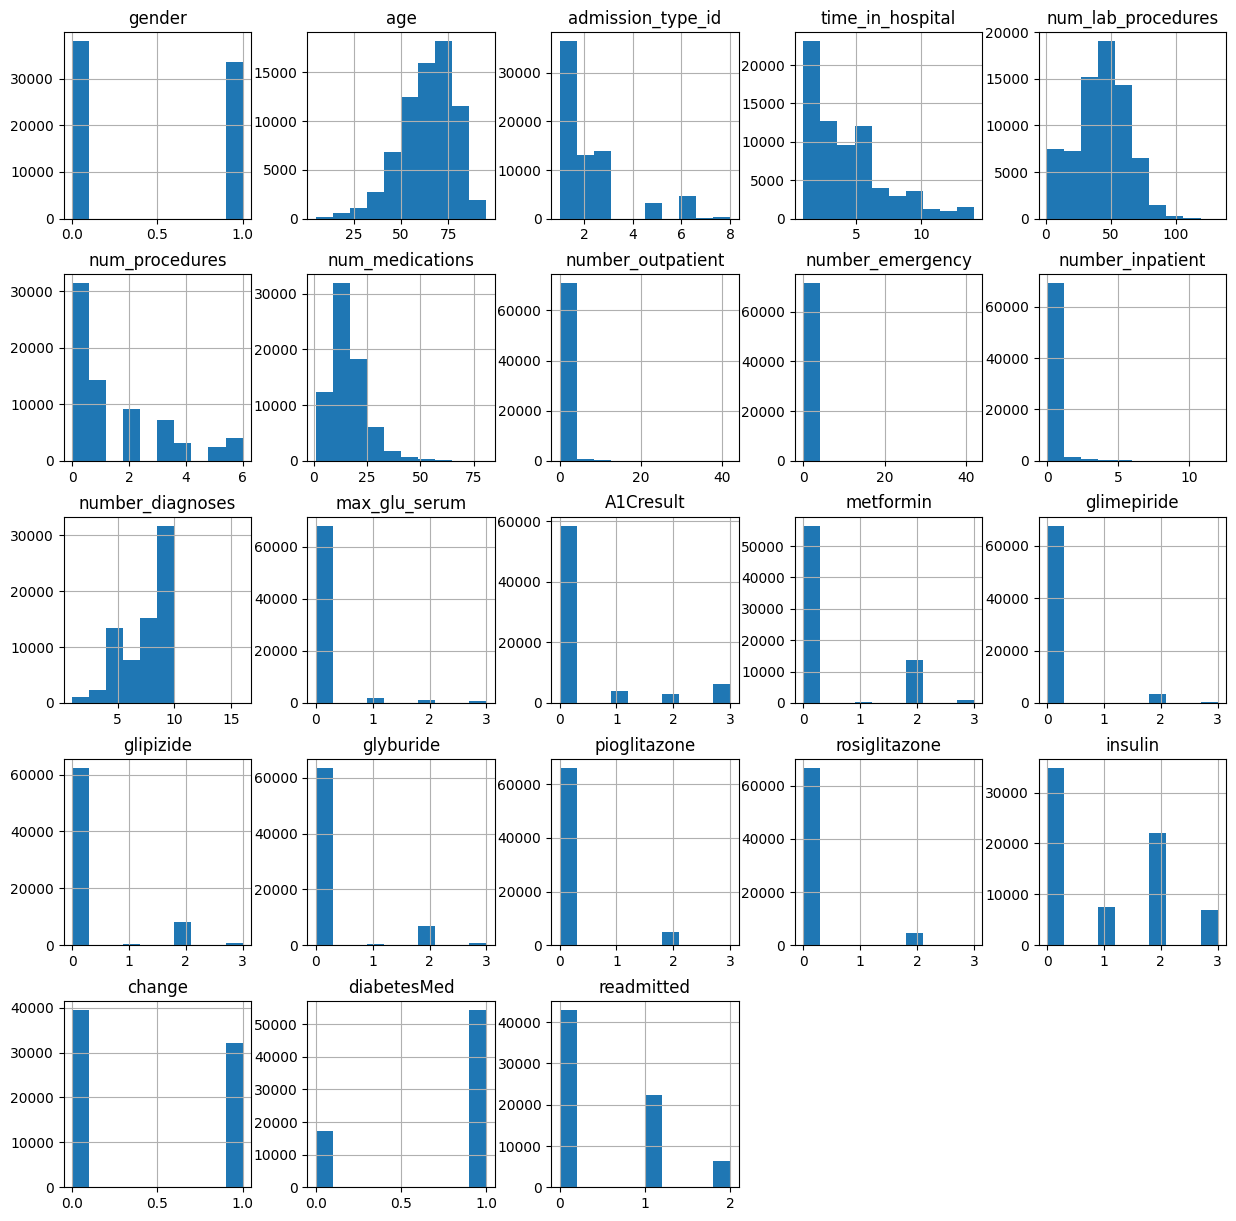

In [53]:
tdf1.hist(figsize=(15,15))
plt.show()

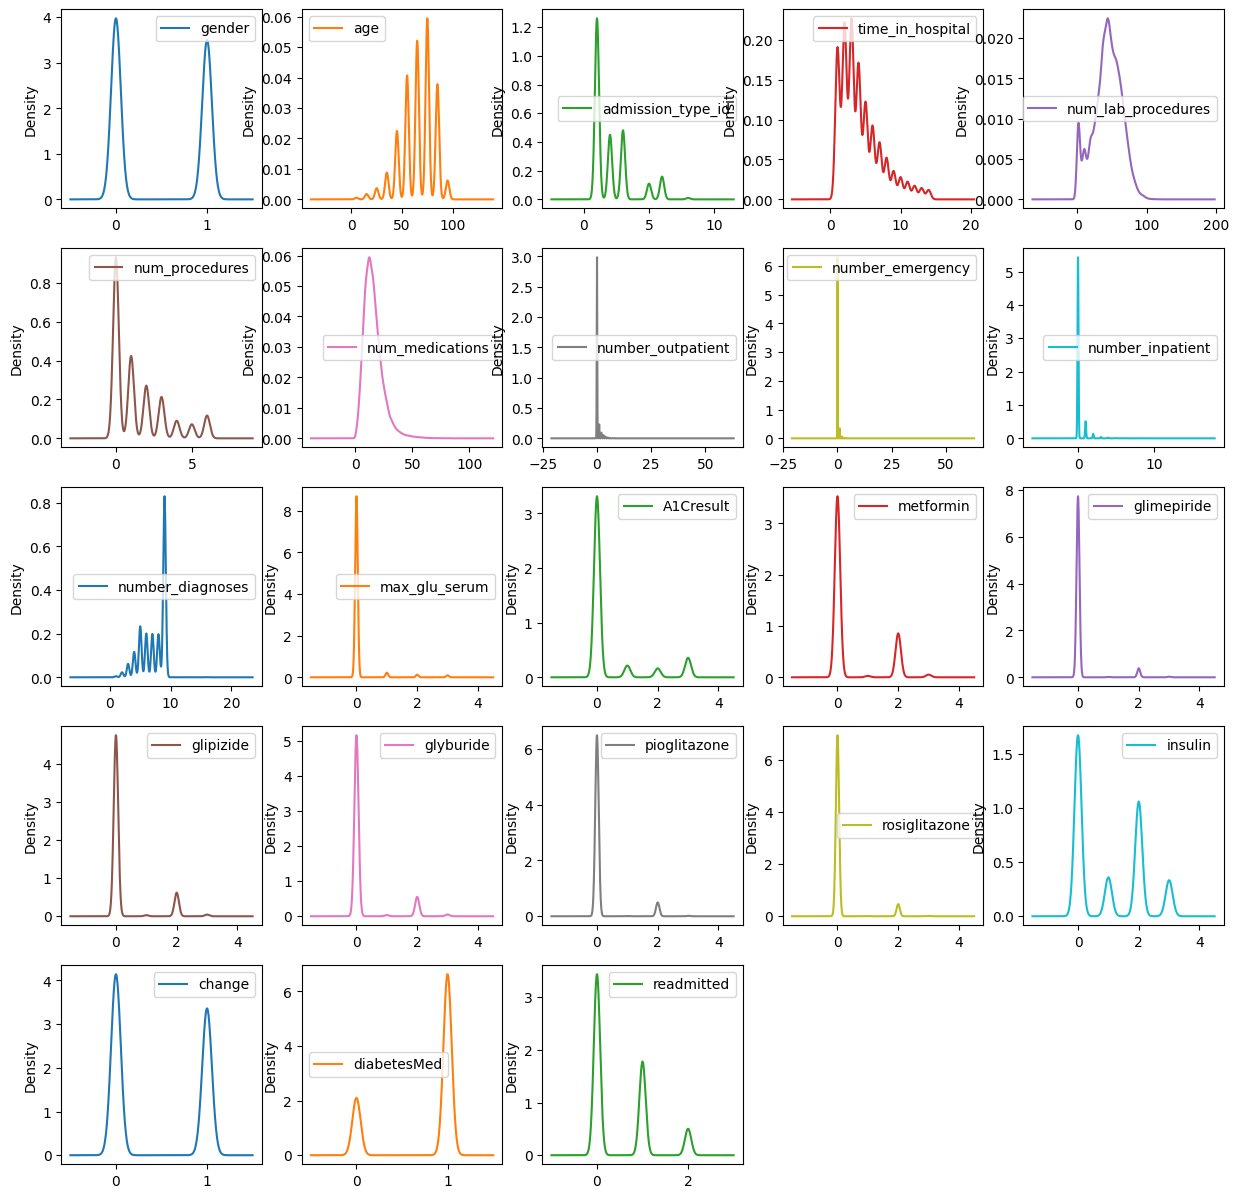

In [59]:
# Density plots of all diabetic diabetic columns 
tdf1.plot(kind= 'density', subplots=True, layout=(5,5), sharex=False, figsize=(15,15))
plt.show()

In [61]:
#tdf['readmitted'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')
#plt.legend(labels=tdf['readmitted'].value_counts().index, title='Readmitted')
# >30--1 ; < 30 --- 2; no readmission --0;
# Display the pie chart

In [102]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              71518 non-null  int64
 1   age                 71518 non-null  int64
 2   admission_type_id   71518 non-null  int64
 3   time_in_hospital    71518 non-null  int64
 4   num_lab_procedures  71518 non-null  int64
 5   num_procedures      71518 non-null  int64
 6   num_medications     71518 non-null  int64
 7   number_outpatient   71518 non-null  int64
 8   number_emergency    71518 non-null  int64
 9   number_inpatient    71518 non-null  int64
 10  number_diagnoses    71518 non-null  int64
 11  max_glu_serum       71518 non-null  int64
 12  A1Cresult           71518 non-null  int64
 13  metformin           71518 non-null  int64
 14  glimepiride         71518 non-null  int64
 15  glipizide           71518 non-null  int64
 16  glyburide           71518 non-null  int64
 1

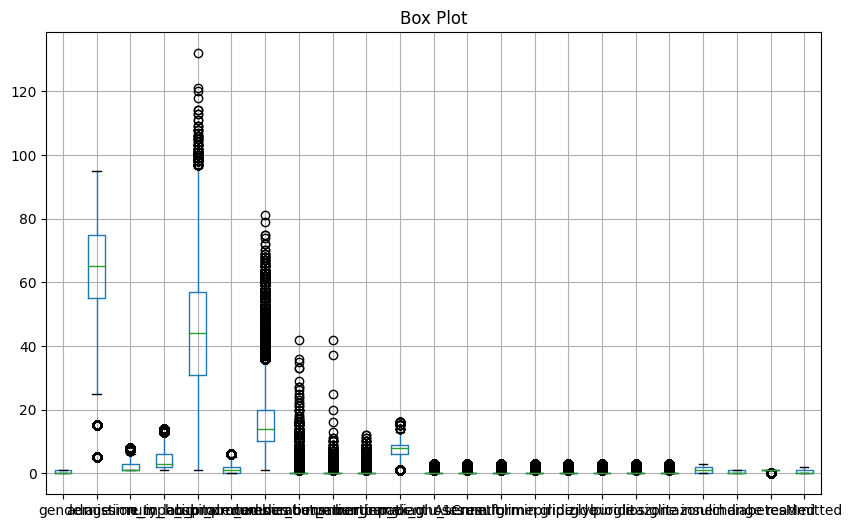

In [68]:
# checks the outlier in each column

tdf1.boxplot(figsize=(10, 6))
plt.title("Box Plot")
plt.show()

#### Bivariate Analysis

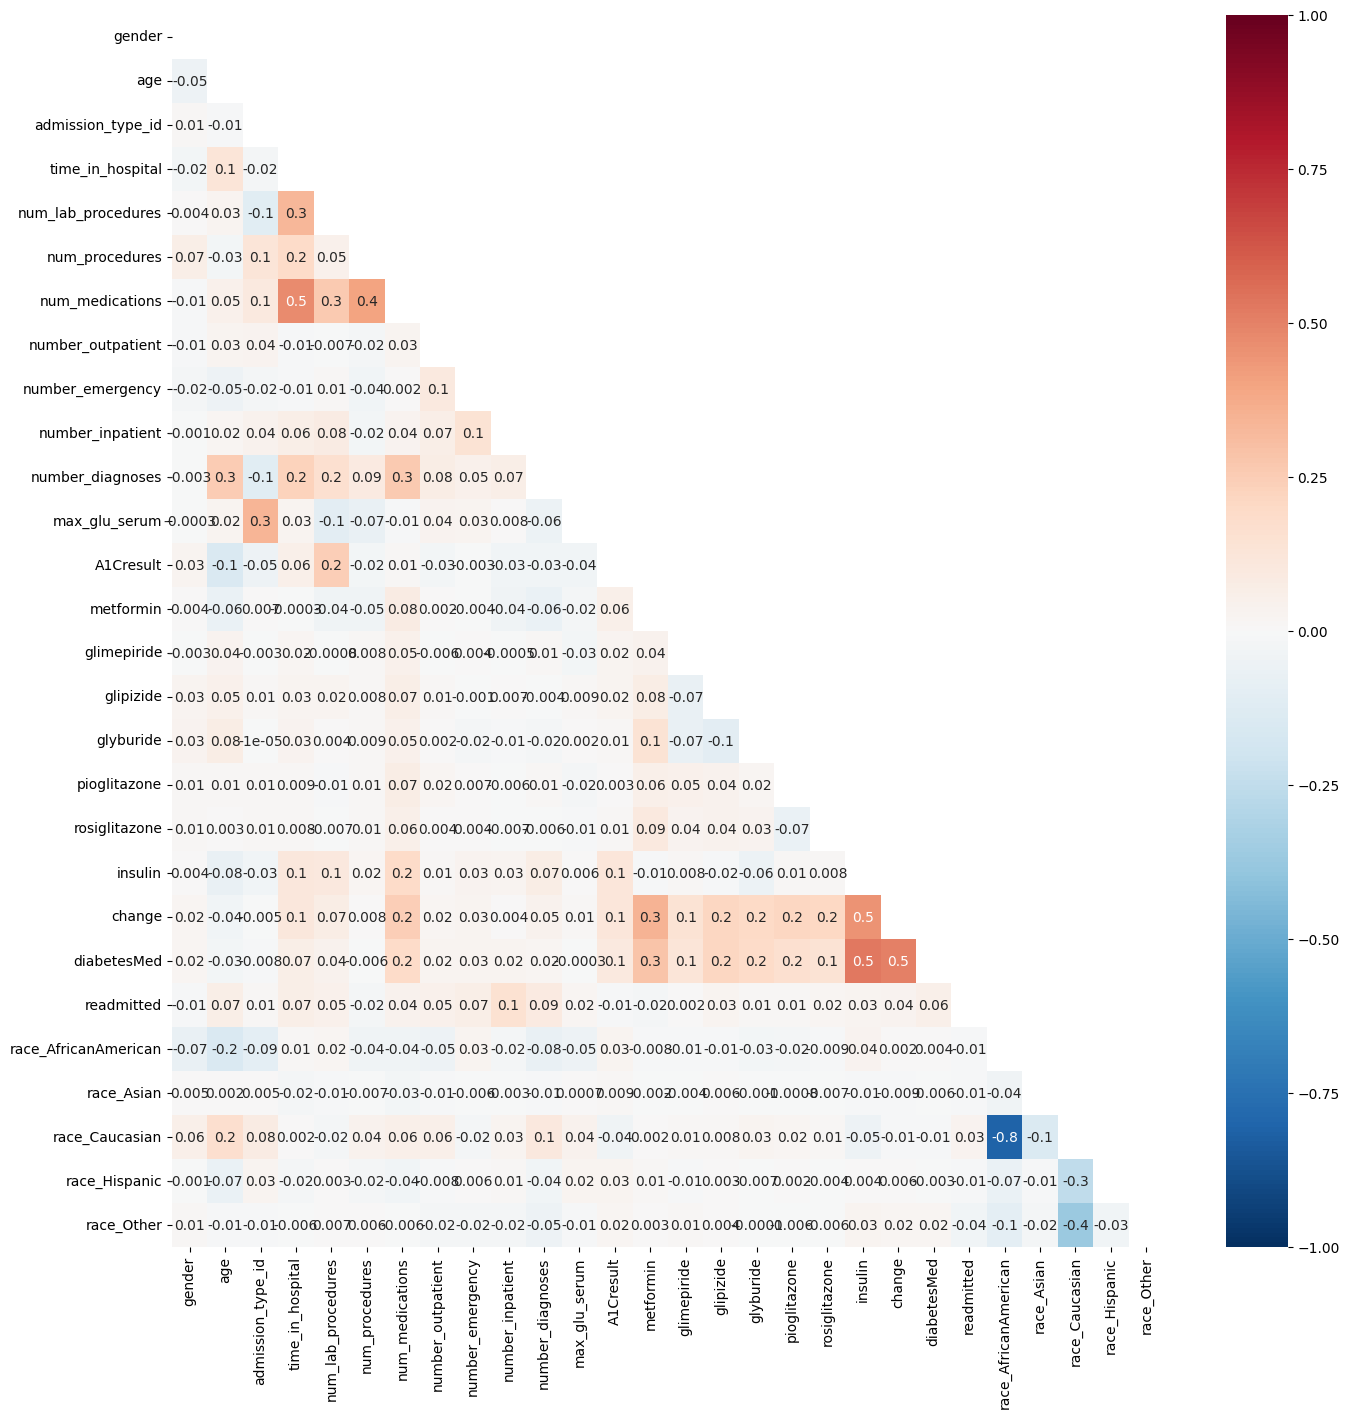

In [98]:
matrix = np.triu(tdf.corr())
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(tdf.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

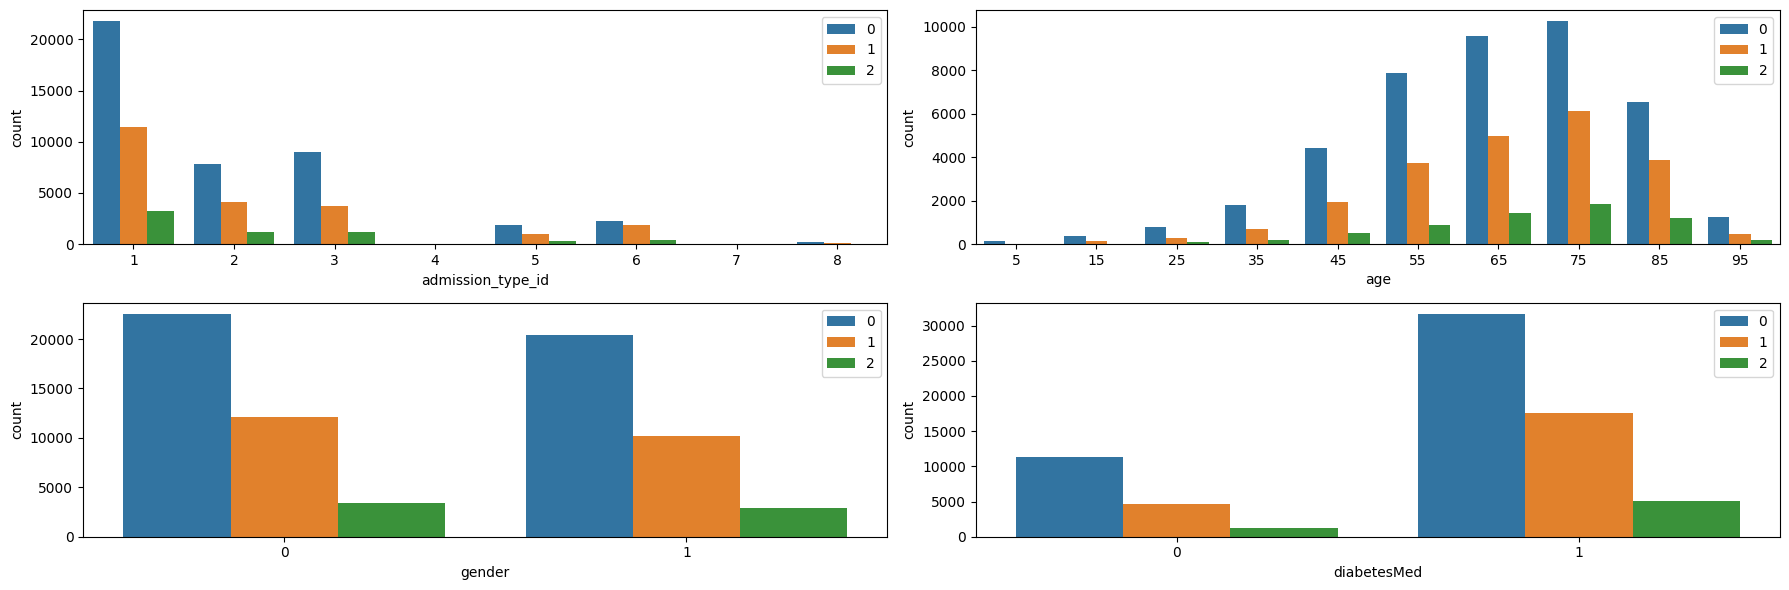

In [70]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=tdf, x='admission_type_id', hue='readmitted', ax=ax1)
sns.countplot(data=tdf, x='age', hue='readmitted', ax=ax2)
sns.countplot(data=tdf, x='gender', hue='readmitted', ax=ax3)
sns.countplot(data=tdf, x='diabetesMed', hue='readmitted', ax=ax4)


ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

# legend here, readmitted: 0 = No, 1 = >30, 2 = <30

#### weak co-relations as readmission in 3 categories is not musch affected by time in hospital

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

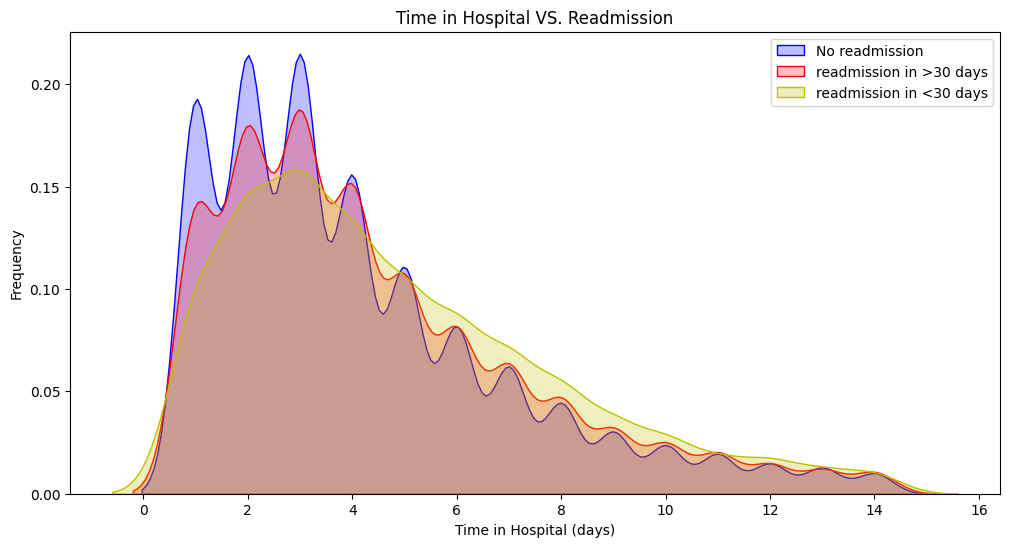

In [73]:
fig = plt.figure(figsize=(12,6))
ax=sns.kdeplot(tdf.loc[(tdf['readmitted'] == 0),'time_in_hospital'] , color='b',fill=True,label='No readmission')
ax=sns.kdeplot(tdf.loc[(tdf['readmitted'] == 1),'time_in_hospital'] , color='r',fill=True, label='readmission in >30 days')
ax=sns.kdeplot(tdf.loc[(tdf['readmitted'] == 2),'time_in_hospital'] , color='y',fill=True, label='readmission in <30 days')
ax.set(xlabel='Time in Hospital (days)', ylabel='Frequency')
ax.legend(["No readmission", "readmission in >30 days", "readmission in <30 days"])
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Admission type VS. Readmission')

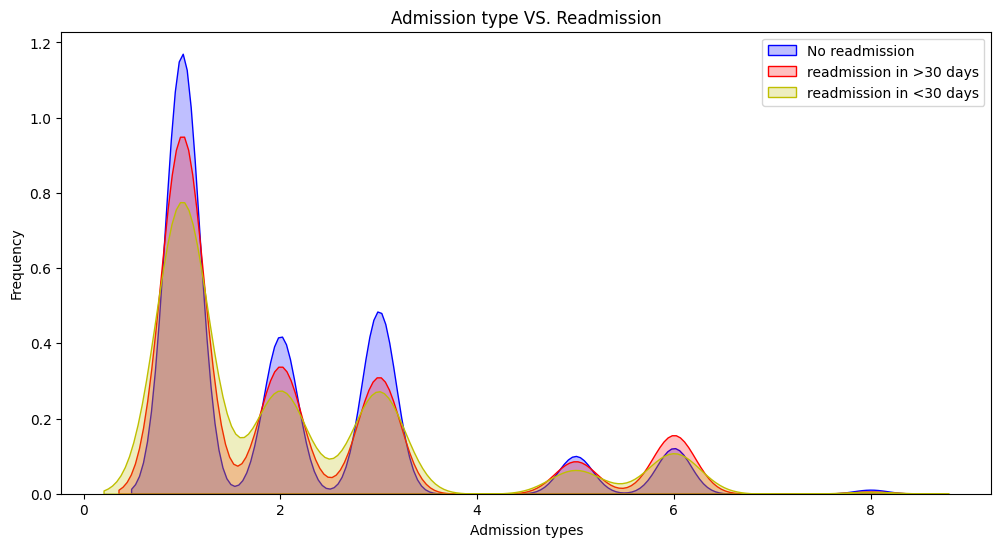

In [75]:
fig = plt.figure(figsize=(12,6))
ax=sns.kdeplot(tdf.loc[(tdf['readmitted'] == 0),'admission_type_id'] , color='b',fill=True,label='No readmission')
ax=sns.kdeplot(tdf.loc[(tdf['readmitted'] == 1),'admission_type_id'] , color='r',fill=True, label='readmission in >30 days')
ax=sns.kdeplot(tdf.loc[(tdf['readmitted'] == 2),'admission_type_id'] , color='y',fill=True, label='readmission in <30 days')
ax.set(xlabel='Admission types', ylabel='Frequency')
ax.legend(["No readmission", "readmission in >30 days", "readmission in <30 days"])
plt.title('Admission type VS. Readmission')

In [ ]:
 # Dummy coding scheme is used to encode the race feature.

In [95]:
tdf = pd.concat([tdf,pd.get_dummies(tdf['race'], prefix='race')], axis=1).drop(['race'],axis=1)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                71518 non-null  int64
 1   age                   71518 non-null  int64
 2   admission_type_id     71518 non-null  int64
 3   time_in_hospital      71518 non-null  int64
 4   num_lab_procedures    71518 non-null  int64
 5   num_procedures        71518 non-null  int64
 6   num_medications       71518 non-null  int64
 7   number_outpatient     71518 non-null  int64
 8   number_emergency      71518 non-null  int64
 9   number_inpatient      71518 non-null  int64
 10  number_diagnoses      71518 non-null  int64
 11  max_glu_serum         71518 non-null  int64
 12  A1Cresult             71518 non-null  int64
 13  metformin             71518 non-null  int64
 14  glimepiride           71518 non-null  int64
 15  glipizide             71518 non-null  int64
 16  glyburid

#### Data Split

In [99]:
y = tdf['readmitted']
X = tdf.drop(['readmitted'], axis=1)

In [130]:
X

,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,pioglitazone,rosiglitazone,insulin,change,diabetesMed,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,0,5,6,1,41,0,1,0,0,0,...,0,0,0,0,0,False,False,True,False,False
1,0,15,1,3,59,0,18,0,0,0,...,0,0,3,1,1,False,False,True,False,False
2,0,25,1,2,11,5,13,2,0,1,...,0,0,0,0,1,True,False,False,False,False
3,1,35,1,2,44,1,16,0,0,0,...,0,0,3,1,1,False,False,True,False,False
4,1,45,1,1,51,0,8,0,0,0,...,0,0,2,1,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,0,75,1,9,50,2,33,0,0,0,...,0,0,2,1,1,False,False,True,False,False
101755,0,45,1,14,73,6,26,0,1,0,...,0,0,3,1,1,False,False,False,False,True
101756,0,65,1,2,46,6,17,1,1,1,...,0,0,2,0,1,False,False,False,False,True
101758,0,85,1,5,76,1,22,0,1,0,...,0,0,3,1,1,False,False,True,False,False


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Model Building

In [123]:
#Randon Forest
rfm = RandomForestClassifier() 
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_test)

In [125]:
print('\nRandom Forest initial Performance:')
print('----------------------------------')
print('F1 Score        : ', metrics.f1_score(y_test, rfm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_test, rfm_pred))
print('Accuracy:\n ', accuracy_score(y_test, rfm_pred))



Random Forest initial Performance:
----------------------------------
F1 Score        :  0.5979213273676361
Confusion Matrix:
  [[11478  1355    24]
 [ 5366  1340    20]
 [ 1464   398    11]]
Accuracy:
  0.5979213273676361


#### model tuning

In [127]:
rfm100 = RandomForestClassifier(n_estimators=500) 
rfm100.fit(X_train,y_train)
rfm100_pred = rfm100.predict(X_test)

In [128]:
print('\nRandom Forest initial Performance:')
print('----------------------------------')
print('F1 Score        : ', metrics.f1_score(y_test, rfm100_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_test, rfm100_pred))
print('Accuracy:\n ', accuracy_score(y_test, rfm100_pred))



Random Forest initial Performance:
----------------------------------
F1 Score        :  0.598806860551827
Confusion Matrix:
  [[11565  1272    20]
 [ 5436  1278    12]
 [ 1481   387     5]]
Accuracy:
  0.598806860551827


### conclusions

Classifying patients whether they need readmission within 30 days and after 30 days or wouldnot require readmission to hospital:
gives us valuable inputs regarding:
- **Identify patients on path to high-cost disease state** :  higher stay in hospital --> higher medication --> higher lab and non lab procedure. here we find greater correlation indicated in the heatmap above. we can devise proper featuring and weightage to get a cost scale on these parameters. Also Change in medication have higher correlation with readmission eventtually higher time in hospital.
- **Assign patient scores based on the severity of condition**: similary patient severity score can be figured using age---> number of diagnoses + glucose serum test + medication usage and change parameter i.e insulin, diabetesMed, having higher coorelation as indicated in heat map. We can even relate admission_type_id, emergency cases with the severity.
- **Seggregate patients for 2 possible care paths**
  - Care Intervention 
  - Lower cost of care

first 2 score can eventually helps us to segregate the 2 possible care paths here
